## E Commerce Exploratory Data Analysis by Kushagra Pathak

In [1]:
# Importing necessary modules and libraries
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
# Extracting the path of current working directory with the help of Operating System module
os.getcwd()

'C:\\Users\\Kush\\Board Infinity'

In [3]:
# Importing data (csv file) in python's dataframe 
df = pd.read_csv("C:\\Users\\Kush\\Board Infinity\\Ecommerce - UK Retailer.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Using shape attribute to know the number of records and columns 
df.shape

(541909, 8)

In [6]:
# Extracting all the details about columns such as non null values along with the datatype using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### . Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [7]:
# Using isnull to get count of null values in each column 
df.isnull().sum()
# 6/8 columns don't have any missing values 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# df['Description'].fillna(df['Description'].mode(), inplace = True)
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [9]:
df['Description'].fillna("WHITE HANGING HEART T-LIGHT HOLDER", inplace = True)

In [10]:
df['CustomerID'].mode()

0    17841.0
dtype: float64

In [11]:
df['CustomerID'].fillna("17841.0", inplace = True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Now there is no null value in the data

### Remove duplicate rows

In [13]:
# Total number of duplicate rows
df.duplicated().sum()

5268

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(536641, 8)

In [16]:
df.duplicated().sum()

0

### Remove rows which have negative values in Quantity column

In [17]:
df = df[df.Quantity > 0]

In [18]:
df.shape

(526054, 8)

In [19]:
df["Quantity"].describe()

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

### Remove rows which have negative values in UnitPrice column

In [20]:
df = df[df.UnitPrice > 0]

In [21]:
df.shape

(524878, 8)

In [22]:
df["UnitPrice"].describe()

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

### Add the columns - Month, Day and Hour for the invoice 

In [23]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [24]:
df.insert(loc=2, column='Year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.InvoiceDate.dt.month)
df.insert(loc=4, column='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.InvoiceDate.dt.hour)

In [25]:
df = df.astype({"Year_month":str})

In [26]:
df = df.astype({"day":str})

In [27]:
df = df.astype({"month":str})

In [28]:
df = df.astype({"hour":str})

In [100]:
df.head()

,InvoiceNo,StockCode,Year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Adding Column Amount spent

In [29]:
df['Amt_spent'] = df["Quantity"]*df["UnitPrice"]

In [30]:
df.head()

,InvoiceNo,StockCode,Year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amt_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Looking at all datatypes, whether some require corrections or not

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Year_month   524878 non-null  object        
 3   month        524878 non-null  object        
 4   day          524878 non-null  object        
 5   hour         524878 non-null  object        
 6   Description  524878 non-null  object        
 7   Quantity     524878 non-null  int64         
 8   InvoiceDate  524878 non-null  datetime64[ns]
 9   UnitPrice    524878 non-null  float64       
 10  CustomerID   524878 non-null  object        
 11  Country      524878 non-null  object        
 12  Amt_spent    524878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 56.1+ MB


#### Everything looks correct so far

## 1. Perform Basic EDA 
### a. Boxplot – All Numeric Variables 

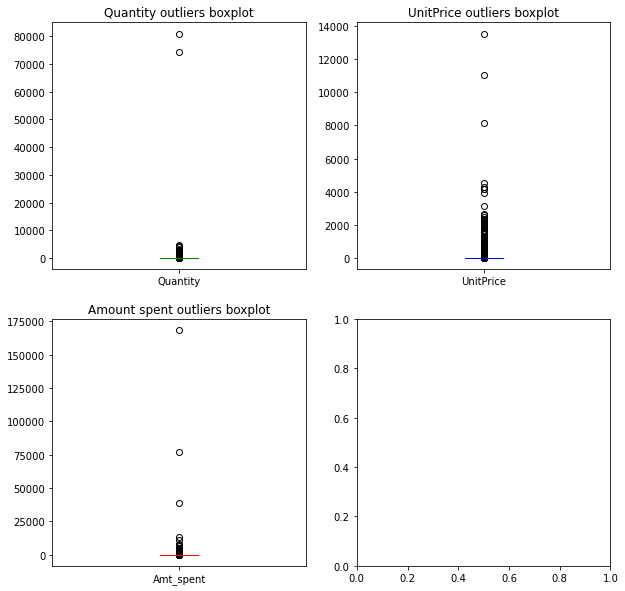

In [32]:
fig, ax = plt.subplots(nrows = 2 , ncols = 2, figsize = (10,10))
df['Quantity'].plot(kind = "box" , color = "g", ax = ax[0,0])
ax[0,0].set_title("Quantity outliers boxplot")
df['UnitPrice'].plot(kind = "box" , color = "b", ax = ax[0,1])
ax[0,1].set_title("UnitPrice outliers boxplot")
df['Amt_spent'].plot(kind = "box" , color = "r", ax = ax[1,0])
ax[1,0].set_title("Amount spent outliers boxplot")
plt.show()

### b. Histogram – All Numeric Variables

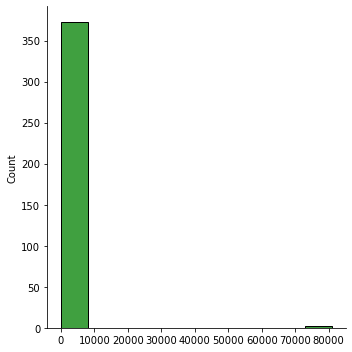

In [33]:
sns.displot(df['Quantity'].unique(), bins = 10 , color = 'g')
plt.show()

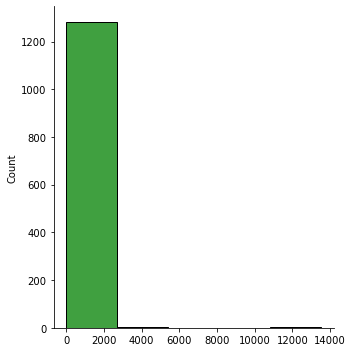

In [34]:
sns.displot(df['UnitPrice'].unique(), bins = 5 , color = 'g')
plt.show()

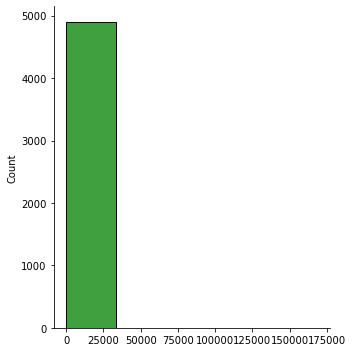

In [35]:
sns.displot(df['Amt_spent'].unique(), bins = 5 , color = 'g')
plt.show()

### Distribution plot is same as histogram

### Aggregation of all numerical columns

In [36]:
df["Quantity"].sum()

5572420

In [37]:
df["UnitPrice"].sum()

2058872.0440000005

In [38]:
df["Amt_spent"].sum()

10642110.804

### Unique values across all columns

In [39]:
df.nunique()

InvoiceNo      19960
StockCode       3922
Year_month        13
month             12
day                6
hour              15
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
CustomerID      4339
Country           38
Amt_spent       4906
dtype: int64

### f. Duplicate values across all columns 

In [40]:
df.duplicated().sum()

0

### g. Correlation – Heatmap - All Numeric Variables 

In [41]:
df.corr()

,Quantity,UnitPrice,Amt_spent
Quantity,1.000000,-0.003788,0.907402
UnitPrice,-0.003788,1.000000,0.137381
Amt_spent,0.907402,0.137381,1.000000


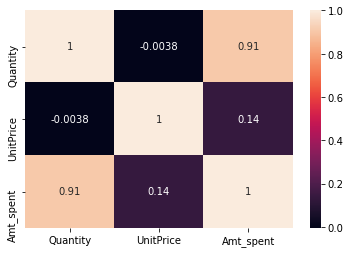

In [42]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### h. Regression Plot - All Numeric Variables

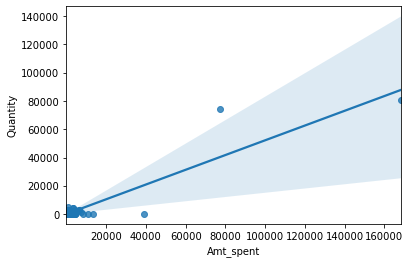

In [79]:
sns.regplot(x = "Amt_spent", y = "Quantity", data = df)
plt.show()

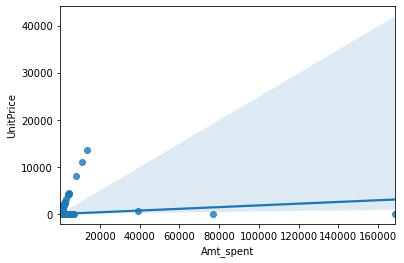

In [44]:
sns.regplot(x = "Amt_spent", y = "UnitPrice", data = df)
plt.show()

In [80]:
#sns.regplot(x = "Quantity", y = "Amt_spent", data = df)
#plt.show()

### i. Barplot All categorical variavles vs all numerical variables 

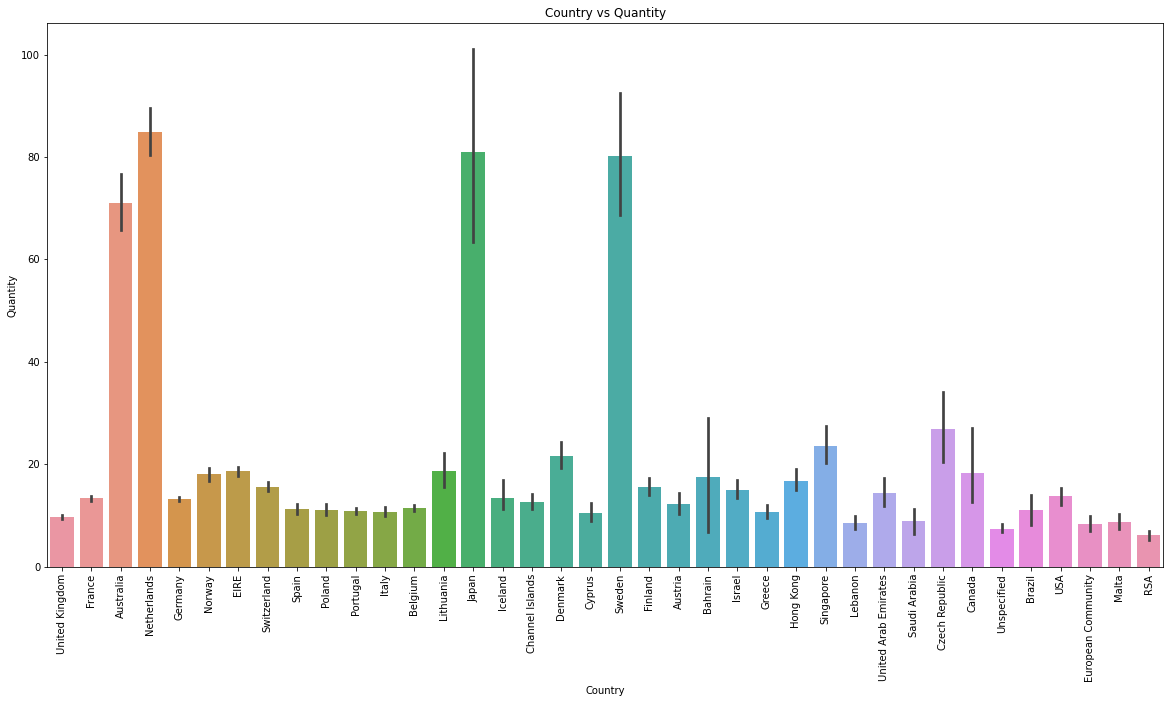

In [46]:
plt.figure (figsize = (20,10))
plt.xticks(rotation=90)
sns.barplot(data = df, x = "Country", y = "Quantity")
plt.title("Country vs Quantity")
plt.show()

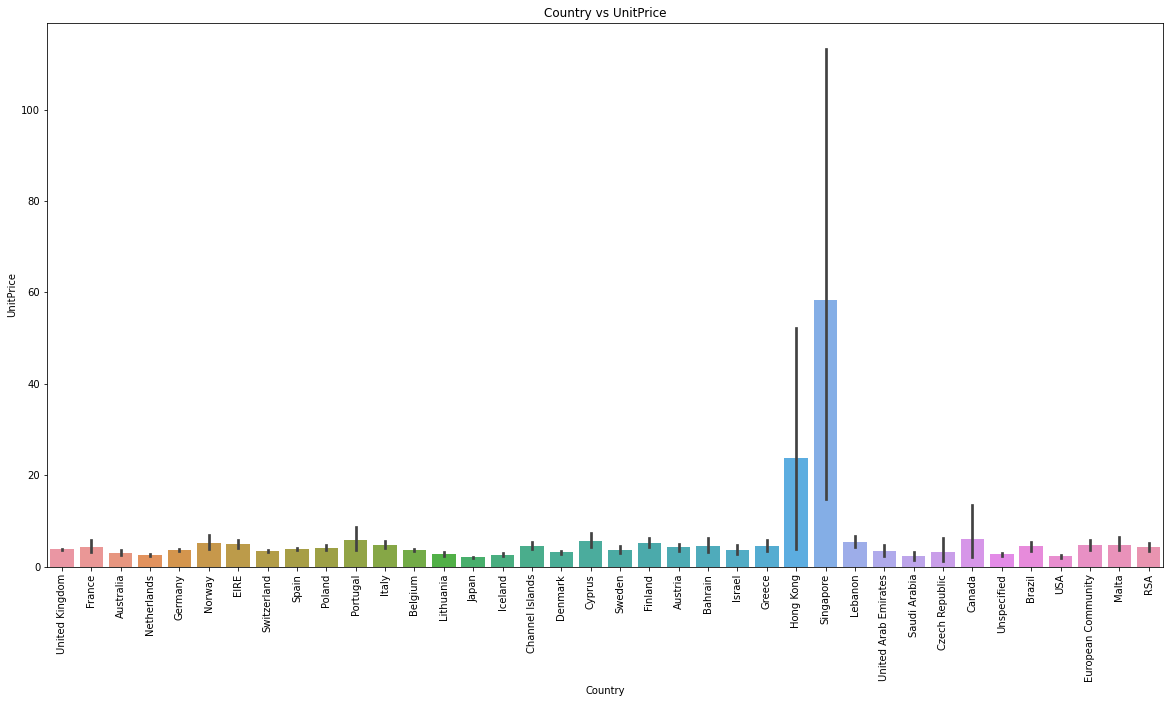

In [47]:
plt.figure (figsize = (20,10))
plt.xticks(rotation=90)
sns.barplot(data = df, x = "Country", y = "UnitPrice")
plt.title("Country vs UnitPrice")
plt.show()

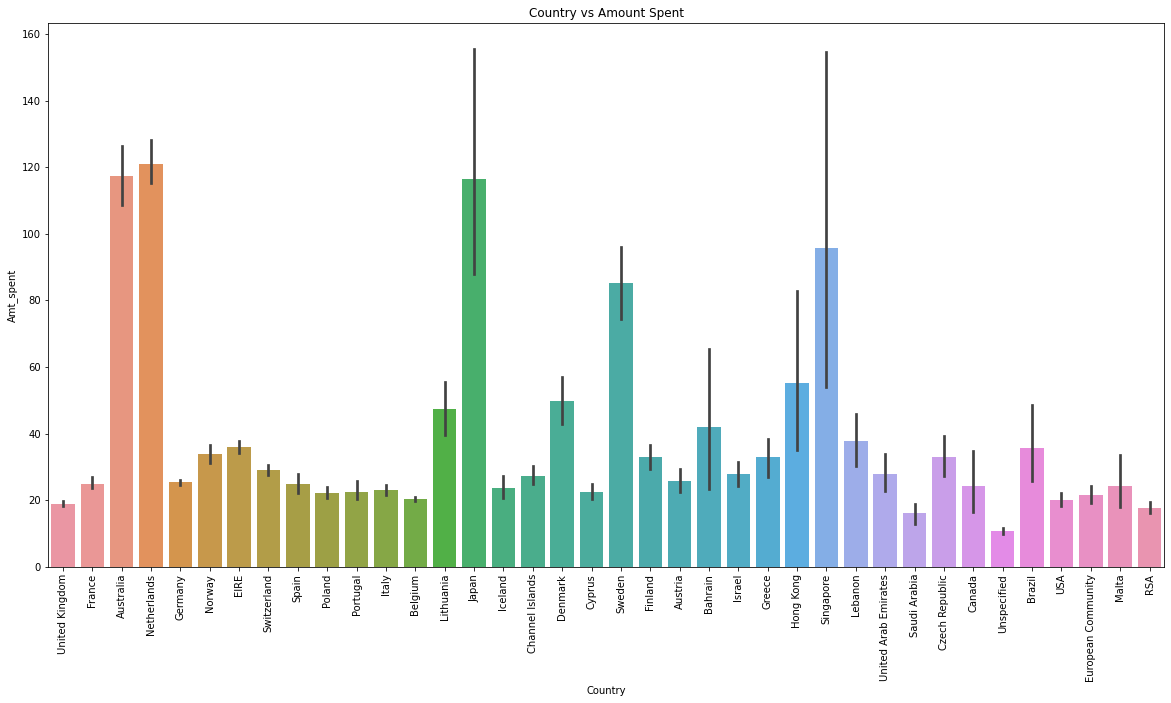

In [48]:
plt.figure (figsize = (20,10))
plt.xticks(rotation=90)
sns.barplot(data = df, x = "Country", y = "Amt_spent")
plt.title("Country vs Amount Spent")
plt.show()

### j. Pair plot - All Numeric Variables

<Figure size 1440x504 with 0 Axes>

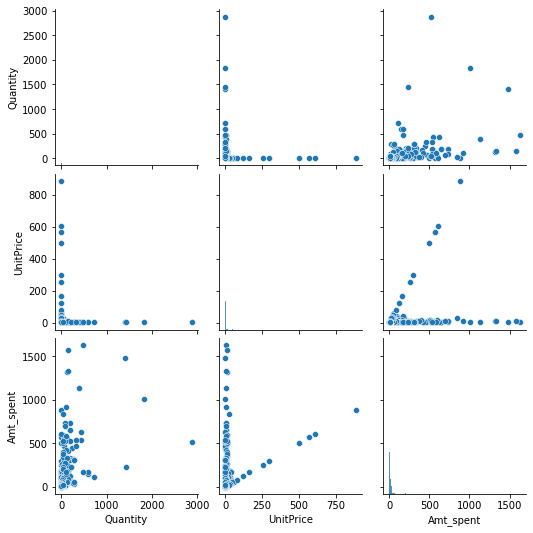

In [49]:
plt.figure (figsize = (20,7))
sns.pairplot(df[:10000])
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables 

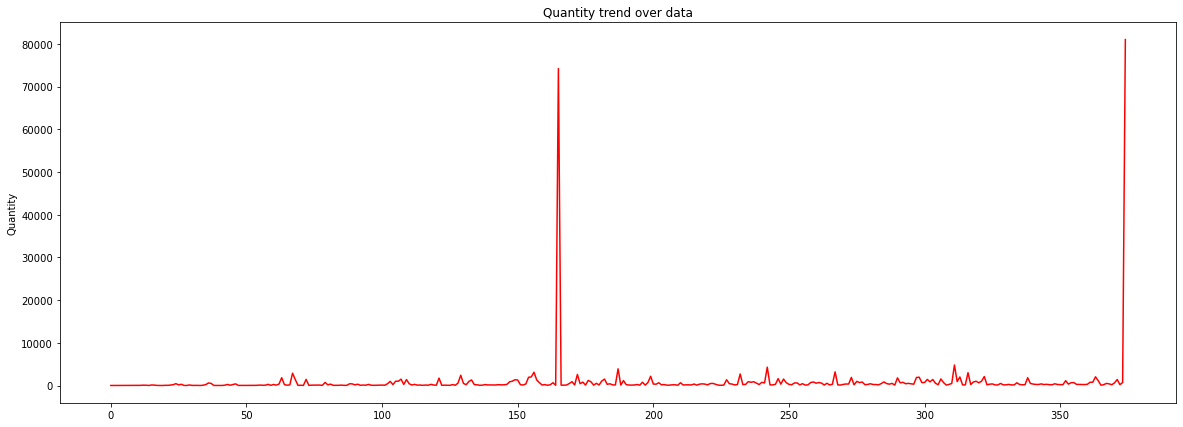

In [81]:
plt.figure(figsize = (20,7))
sns.lineplot(data = df["Quantity"].unique(),color = 'r')
plt.title("Quantity trend over data")
plt.ylabel("Quantity")
plt.show()

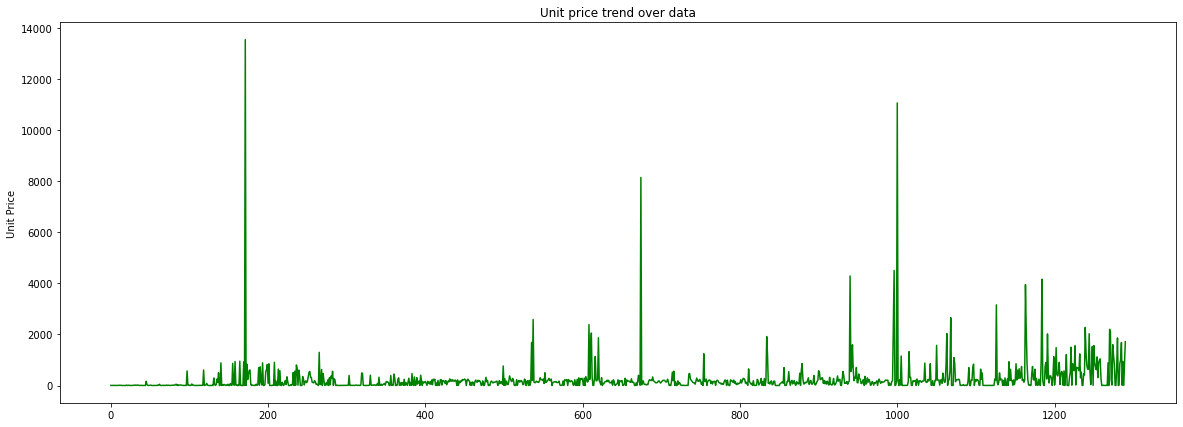

In [82]:
plt.figure (figsize = (20,7))
sns.lineplot(data = df["UnitPrice"].unique(),color = 'g')
plt.title("Unit price trend over data")
plt.ylabel("Unit Price")
plt.show()

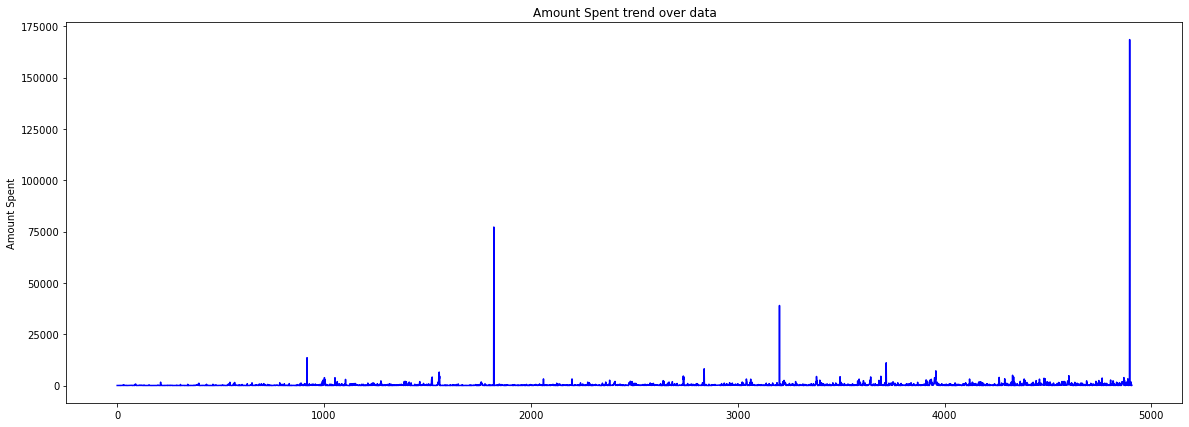

In [83]:
plt.figure (figsize = (20,7))
sns.lineplot(data = df["Amt_spent"].unique(),color = 'b')
plt.title("Amount Spent trend over data")
plt.ylabel("Amount Spent")
plt.show()

### l. Plot the skewness - All Numeric Variables

In [53]:
from scipy.stats import skew

In [84]:
df["Quantity"].skew()

469.54178476684893

In [88]:
df["Quantity"].mean()

10.616600429052085

In [55]:
df["UnitPrice"].skew()

205.08516799804903

In [85]:
df["UnitPrice"].mean()

3.922572567329219

In [56]:
df["Amt_spent"].skew()

504.23256211676784

In [91]:
df["Amt_spent"].mean()

20.275398862219475

### How many orders made by the customers?

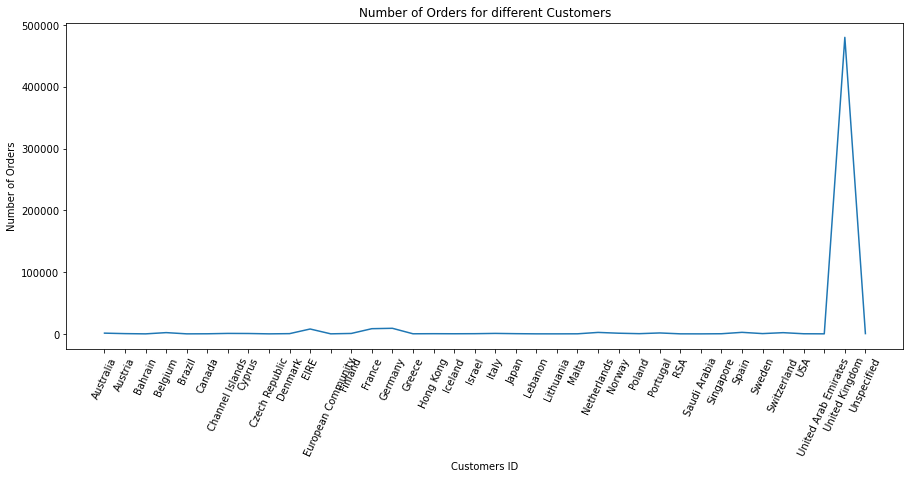

In [77]:
orders = df.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.Country, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.xticks(rotation = 65)
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [59]:
orders.count()

CustomerID    4355
Country       4355
InvoiceNo     4355
dtype: int64

### TOP 5 customers with higher number of orders

In [60]:
print('The TOP 5 customers with most number of orders are: -')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders are: -


,CustomerID,Country,InvoiceNo
4353,17841.0,United Kingdom,130782
4018,17841.0,United Kingdom,7676
1887,14911.0,EIRE,5670
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4412


### How much money spent by the customers? 


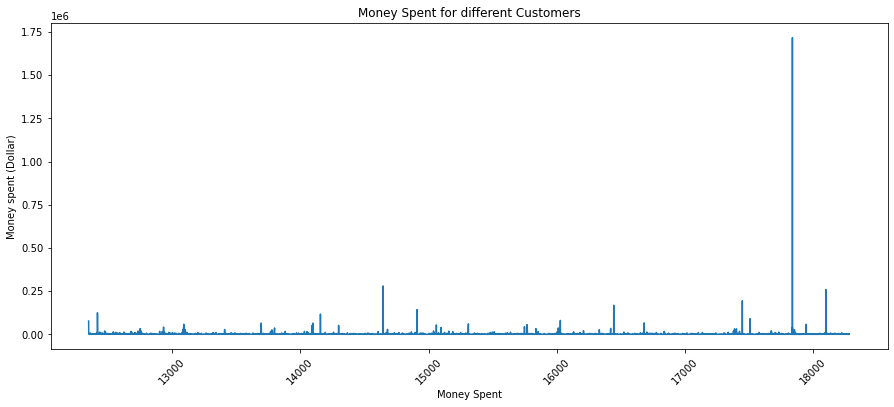

In [96]:
'''money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amt_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amt_spent)
plt.xlabel('Money Spent')
plt.xticks(rotation = 45)
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()'''

In [62]:
df["Amt_spent"].sum()

10642110.804

### TOP 5 customers with highest money spent 

In [63]:
print('The TOP 5 customers with highest money spent are: -')
money_spent.sort_values(by='Amt_spent', ascending=False).head()

The TOP 5 customers with highest money spent are: -


,CustomerID,Country,Amt_spent
4353,17841.0,United Kingdom,1.716719e+06
1697,14646.0,Netherlands,2.802060e+05
4209,18102.0,United Kingdom,2.596573e+05
3736,17450.0,United Kingdom,1.943908e+05
3016,16446.0,United Kingdom,1.684725e+05


###  How many orders per month?

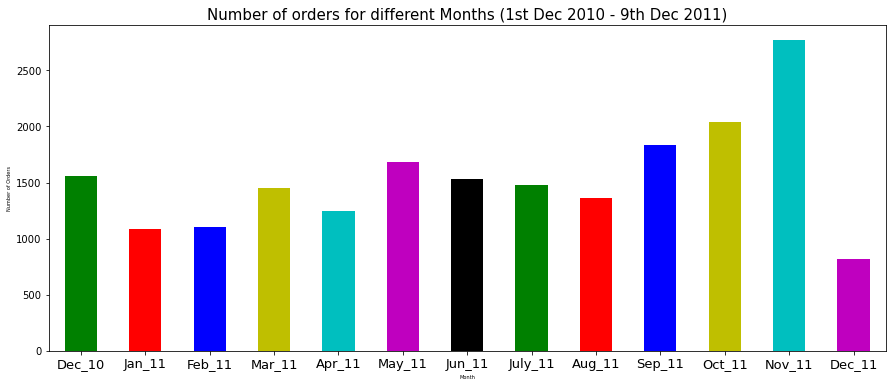

In [97]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind = 'bar',color=['g','r','b','y','c','m','k']*2,figsize=(15,6))
ax.set_xlabel('Month',fontsize=5)
ax.set_ylabel('Number of Orders',fontsize=5)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [65]:
print(df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index())

[1]    3126
[2]    3554
[3]    3690
[4]    4246
[5]    3140
[7]    2204
Name: day, dtype: int64


###  How many orders per day?

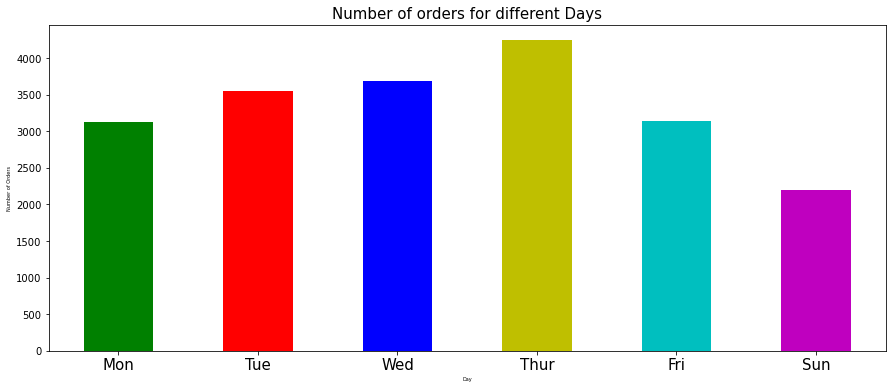

In [98]:
x = df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind = 'bar',color=['g','r','b','y','c','m','k'],figsize=(15,6))
x.set_xlabel('Day',fontsize=5)
x.set_ylabel('Number of Orders',fontsize=5)
x.set_title('Number of orders for different Days',fontsize=15)
x.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [67]:
print(df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index())

[1]    3126
[2]    3554
[3]    3690
[4]    4246
[5]    3140
[7]    2204
Name: day, dtype: int64


###  How many orders per hour?

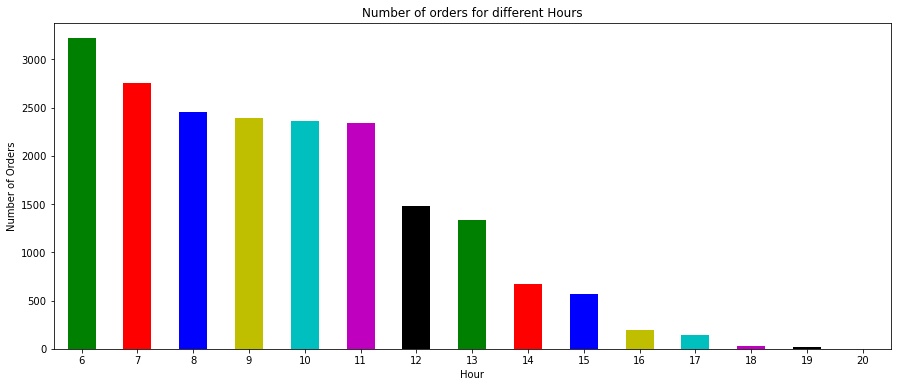

In [99]:
x = df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].plot(kind = 'bar',color=['g','r','b','y','c','m','k'],figsize=(15,6))
x.set_xlabel('Hour')
x.set_ylabel('Number of Orders')
x.set_title('Number of orders for different Hours')
x.set_xticklabels(range(6,21), rotation='horizontal')
plt.show()

In [69]:
print(df.groupby('InvoiceNo')['hour'].unique().value_counts())

[12]        3219
[13]        2753
[14]        2457
[11]        2395
[10]        2361
[15]        2336
[9]         1484
[16]        1335
[17]         667
[8]          566
[18]         192
[19]         146
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: hour, dtype: int64


### How many orders for each country? 

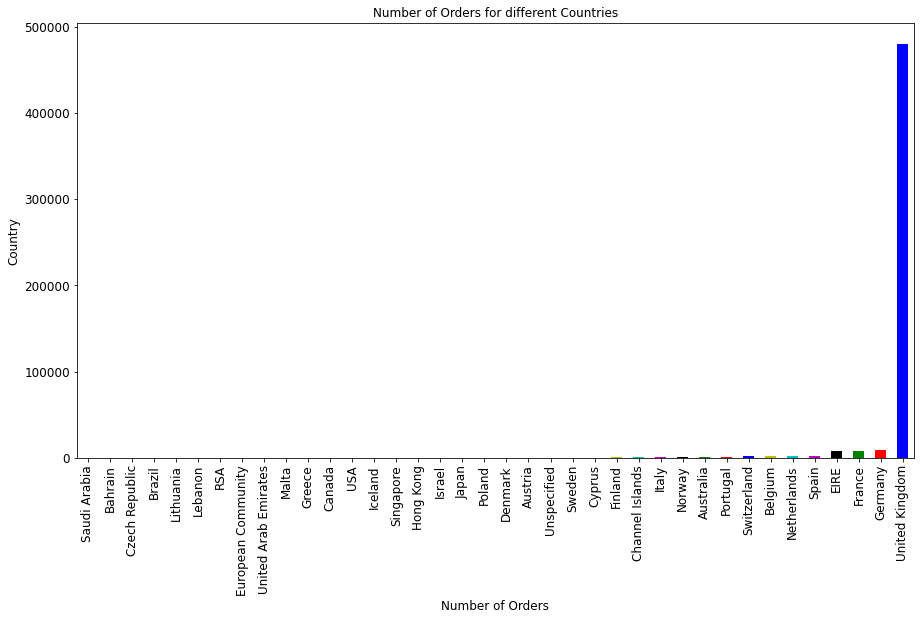

In [70]:
country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
country_orders.plot(kind = 'bar', fontsize=12, color=['g','r','b','y','c','m','k']*10)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

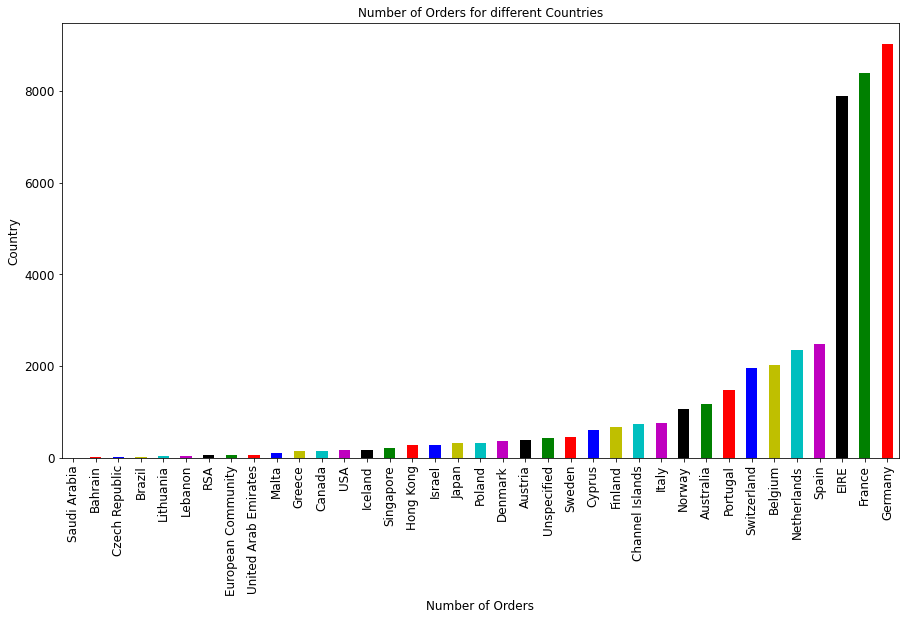

In [71]:
country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del country_orders['United Kingdom']
plt.subplots(figsize=(15,8))
country_orders.plot(kind = 'bar', fontsize=12, color=['g','r','b','y','c','m','k']*10)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### Orders trend across months 

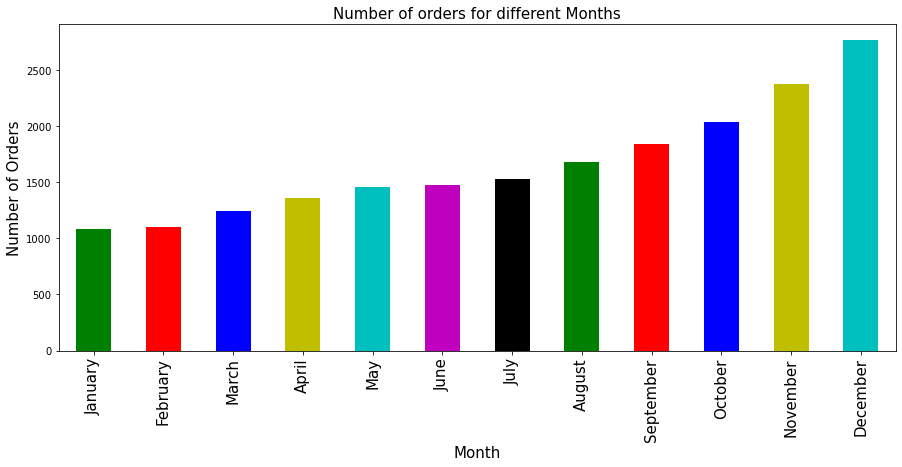

In [72]:
x = df.groupby('InvoiceNo')['month'].unique().value_counts().sort_values().plot(kind = 'bar',color=['g','r','b','y','c','m','k'],figsize=(15,6))
x.set_xlabel('Month',fontsize=15)
x.set_ylabel('Number of Orders',fontsize=15)
x.set_title('Number of orders for different Months',fontsize=15)
x.set_xticklabels(('January','February','March','April','May','June','July','August','September','October','November','December'), rotation=90, fontsize=15)
plt.show()

In [73]:
print(df.groupby('InvoiceNo')['month'].unique().value_counts().sort_values())

[1]     1086
[2]     1100
[4]     1246
[8]     1361
[3]     1454
[7]     1475
[6]     1533
[5]     1681
[9]     1837
[10]    2040
[12]    2378
[11]    2769
Name: month, dtype: int64


### 15. How much money spent by each country? 

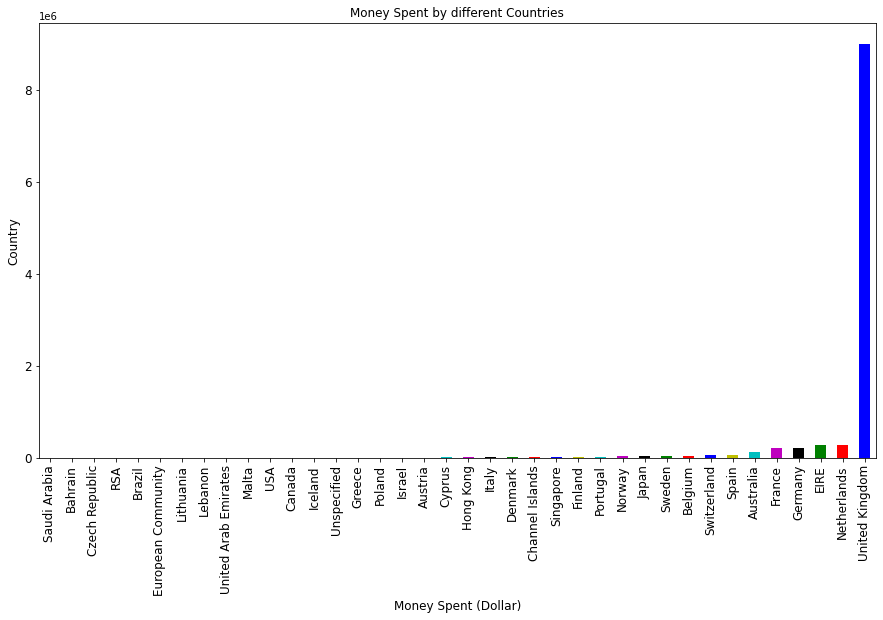

In [74]:
country_amount_spent = df.groupby('Country')['Amt_spent'].sum().sort_values()
plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind = 'bar', fontsize=12, color=['g','r','b','y','c','m','k']*10)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

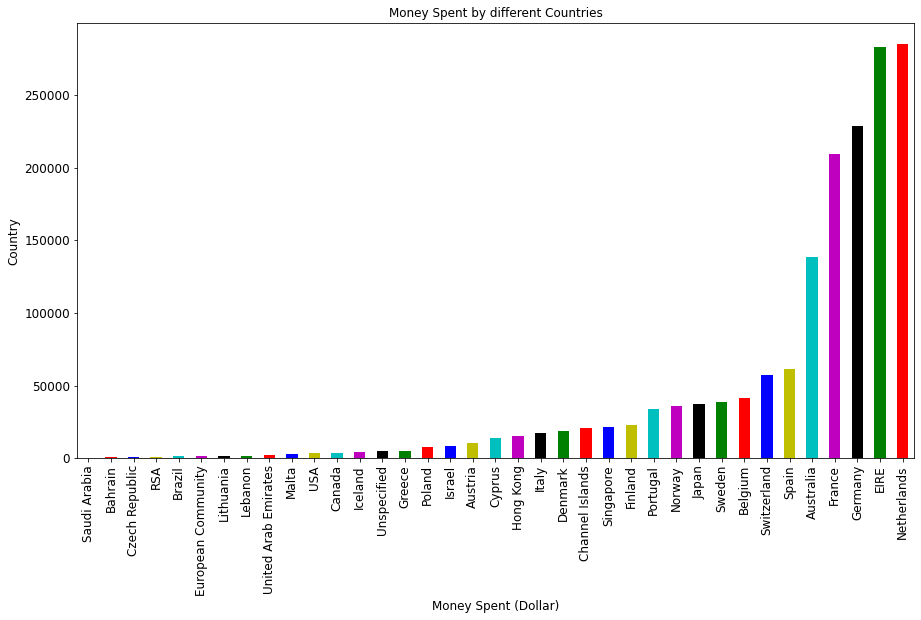

In [75]:
country_amount_spent = df.groupby('Country')['Amt_spent'].sum().sort_values()
del country_amount_spent['United Kingdom']
plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind = 'bar', fontsize=12, color=['g','r','b','y','c','m','k']*10)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()